# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
# how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
# Forecasting.

#  Forecasting Airlines Passengers data set

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
airlines = pd.read_excel('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Forecasting/Airlines+Data.xlsx')
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
airlines.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


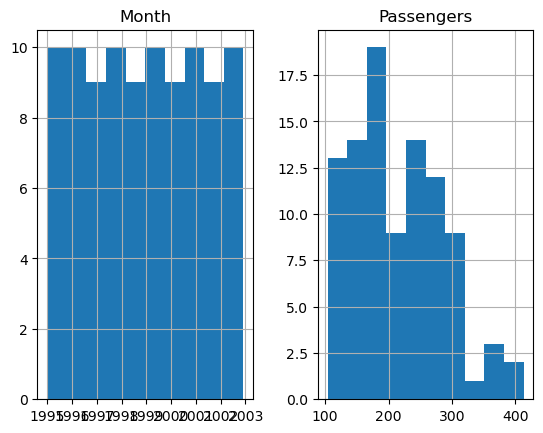

In [5]:
# Visualisations
airlines.hist()
plt.show()

<Axes: ylabel='Density'>

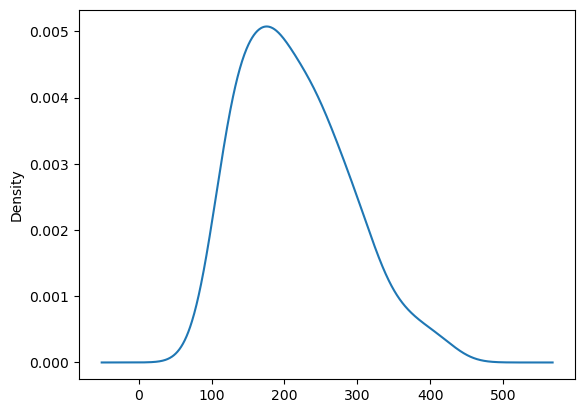

In [6]:
airlines.Passengers.plot(kind='kde')

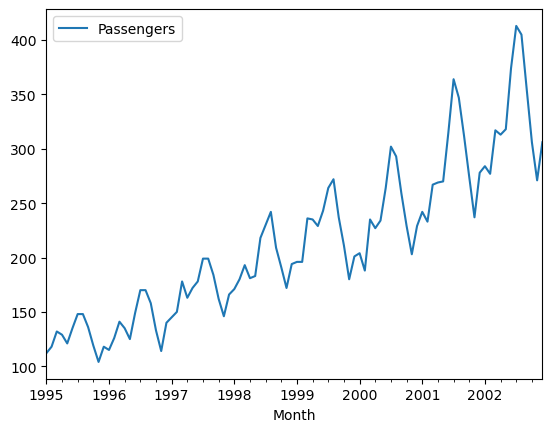

In [7]:
# LinePlot
series1 = pd.read_excel('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Forecasting/Airlines+Data.xlsx', header=0, index_col=0)
series1.plot()
plt.show()

In [8]:
series1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


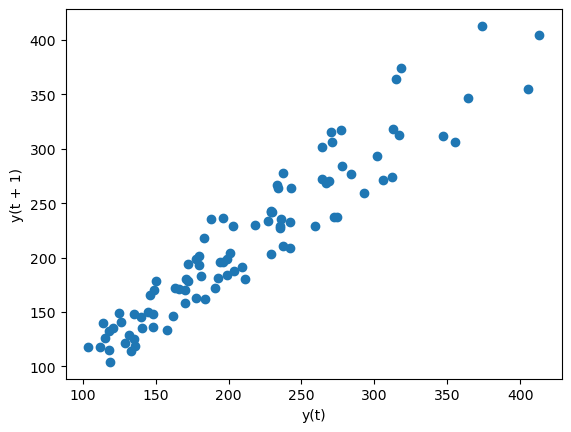

In [9]:
# Lag plot
from pandas import read_csv
from pandas.plotting import lag_plot
lag_plot(series1)
plt.show()

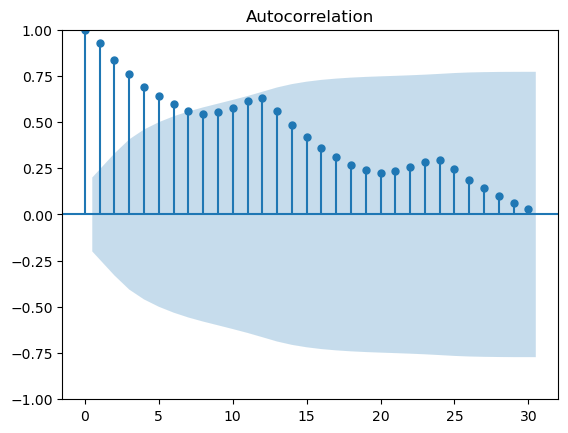

In [11]:
# Create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1,lags=30)
plt.show()

In [12]:
# Applying Transformation
from pandas import DataFrame
from numpy import sqrt

In [14]:
# Upsampling the data to each and every day
upsampled = series1.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


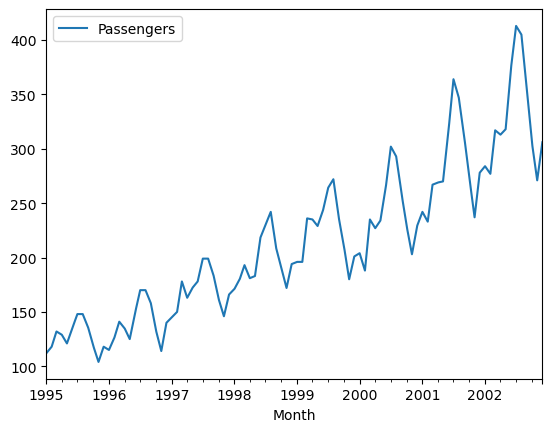

In [15]:
# Interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

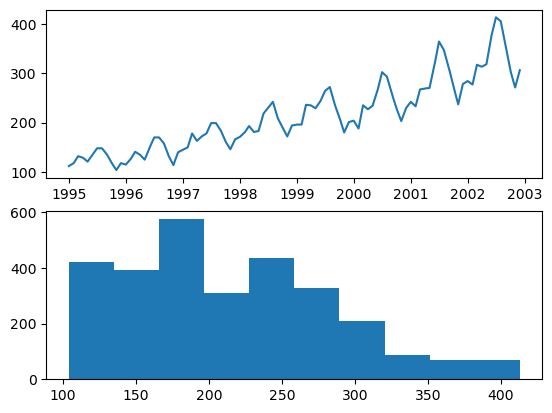

In [16]:
# Before Transformation

# Line plot
plt.subplot(211)
plt.plot(interpolated)
# Histogram
plt.subplot(212)
plt.hist(interpolated)
plt.show()

In [17]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


In [25]:
# Square Root Transform
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

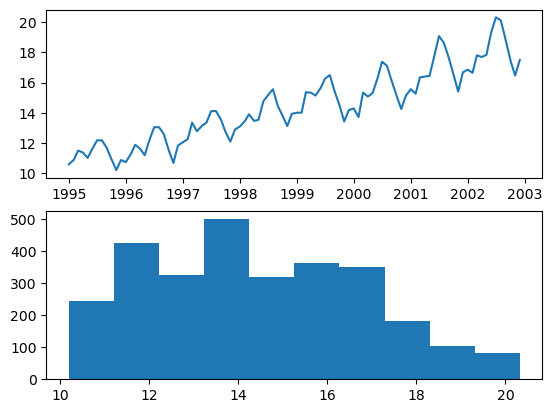

In [26]:
# Line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# Histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [27]:
dataframe['Passengers']

Month
1995-01-01    10.583005
1995-01-02    10.592146
1995-01-03    10.601278
1995-01-04    10.610403
1995-01-05    10.619519
                ...    
2002-11-27    17.358955
2002-11-28    17.392527
2002-11-29    17.426034
2002-11-30    17.459477
2002-12-01    17.492856
Freq: D, Name: Passengers, Length: 2892, dtype: float64

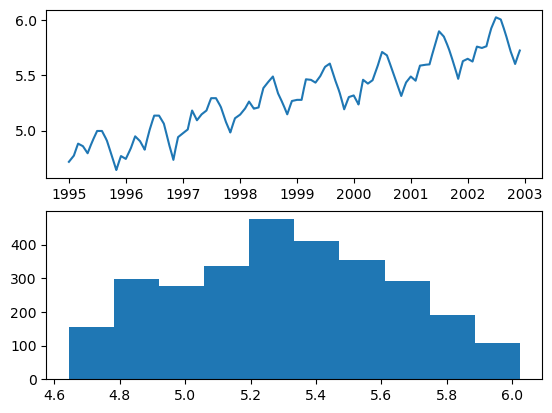

In [21]:
# Log Transform
from numpy import log
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# Line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# Histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [23]:
dataframe['Passengers']

Month
1995-01-01    4.718499
1995-01-02    4.720225
1995-01-03    4.721949
1995-01-04    4.723670
1995-01-05    4.725388
                ...   
2002-11-27    5.708217
2002-11-28    5.712081
2002-11-29    5.715931
2002-11-30    5.719765
2002-12-01    5.723585
Freq: D, Name: Passengers, Length: 2892, dtype: float64

In [28]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [29]:
# Plotting Heatmap
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [31]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"] = airlines.Date.dt.strftime("%b")
airlines["Year"] = airlines.Date.dt.strftime("%Y")

<Axes: xlabel='Month', ylabel='Year'>

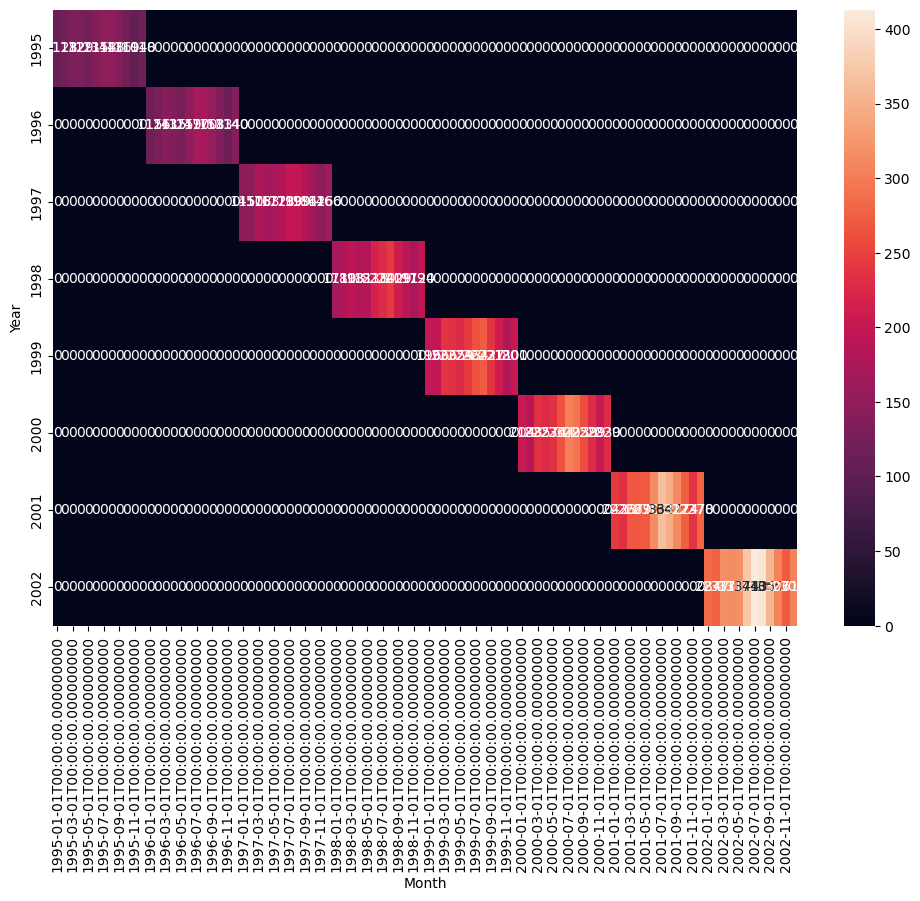

In [32]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='Year', ylabel='Passengers'>

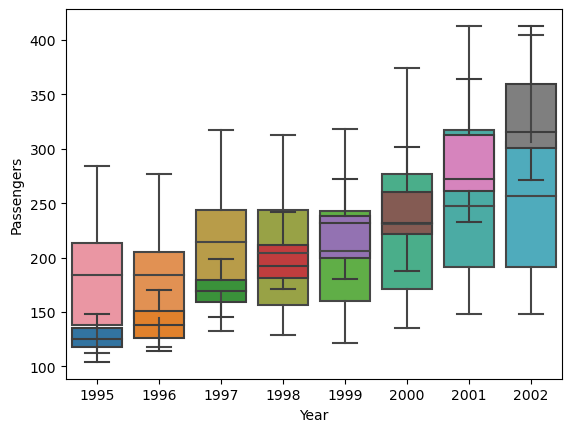

In [34]:
sns.boxplot(x="Months",y="Passengers",data=airlines)
sns.boxplot(x="Year",y="Passengers",data=airlines)

In [36]:
Month_Dummies = pd.get_dummies(airlines['Months'])
Month_Dummies = pd.DataFrame(Month_Dummies)
airline1 = pd.concat([airlines,Month_Dummies],axis=1)

In [38]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,False,False,False,False,True,False,False,False,False,False,False,False,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,False,False,False,True,False,False,False,False,False,False,False,False,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,False,False,False,False,False,False,False,True,False,False,False,False,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,True,False,False,False,False,False,False,False,False,False,False,False,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,False,False,False,False,False,False,False,False,True,False,False,False,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,False,True,False,False,False,False,False,False,False,False,False,False,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,False,False,False,False,False,False,False,False,False,False,False,True,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,False,False,False,False,False,False,False,False,False,False,True,False,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,False,False,False,False,False,False,False,False,False,True,False,False,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

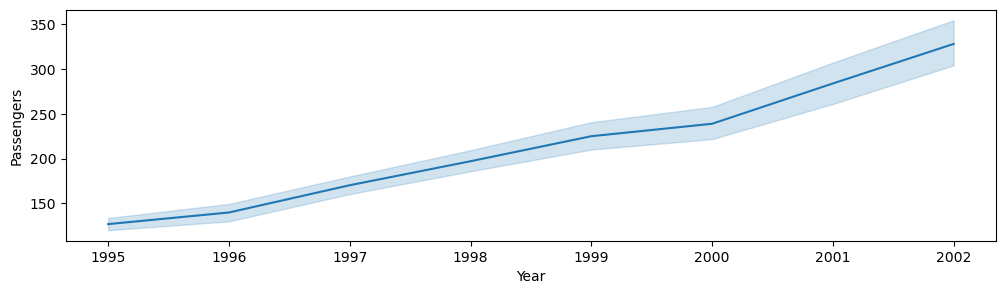

In [39]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)

In [40]:
Train = airline1.head(80)
Test = airline1.tail(16)

In [41]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

In [42]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334322

In [43]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584249

In [44]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

In [45]:
# Additive Seasonality quadrative

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570104204

In [46]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.3264841462108

In [47]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230306555

In [48]:
# Testing

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


In [49]:
# Predictions

t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [50]:
t_squared = np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [51]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [52]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [53]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [54]:
# Build the model on entire Dataset
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [55]:
newdata["forecasted_passengers"] = pd.Series(pred_new)
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298


# Output:
Mutiplicative Additive Seasonality gives the best prediction of least RMSE of 9.42

# coca cola dataset

In [56]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [57]:
df = pd.read_excel('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [58]:
df.shape

(42, 2)

<Axes: >

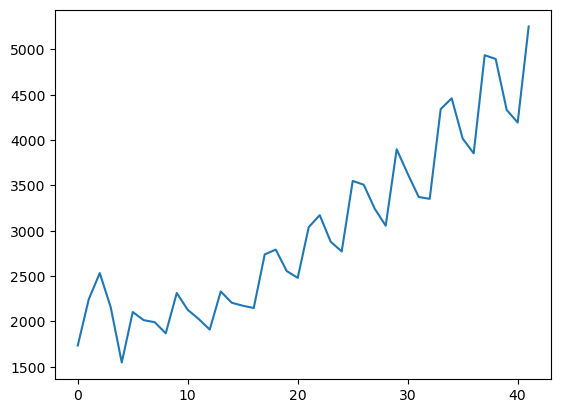

In [59]:
df.Sales.plot()

So, this plot is upward trending with additive seasonality

In [60]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [62]:
# Data driven model approach
Train = df.head(32)
Test = df.tail(10)

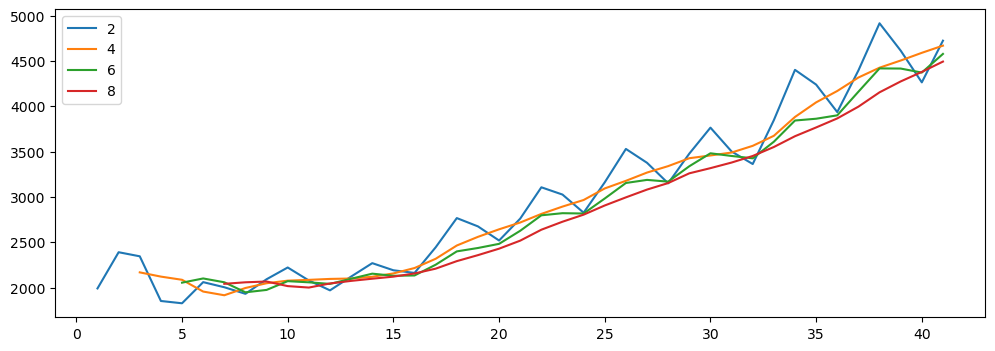

In [63]:
# Moving Average
plt.figure(figsize=(12,4))
for i in range(2, 9, 2):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

<Figure size 1200x1000 with 0 Axes>

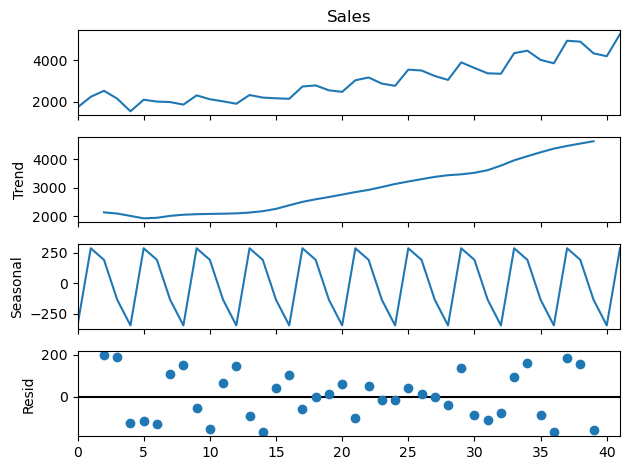

In [64]:
# Time Series Decomposition Plot
plt.figure(figsize=(12,10))
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
decompose_ts_add.plot()
plt.show()

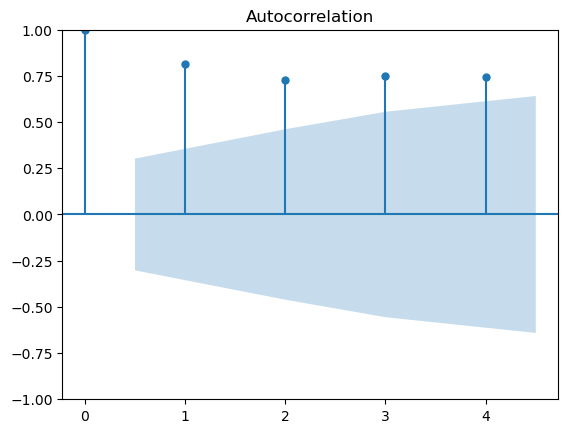

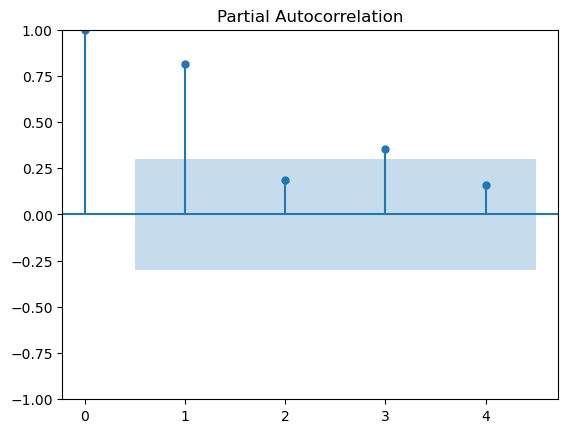

In [65]:
# ACF plots and PACF plots
tsa_plots.plot_acf(df.Sales,lags=4)
tsa_plots.plot_pacf(df.Sales,lags=4)
plt.show()

In [66]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [68]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


22.730302345532625

In [69]:
# Holt Method
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\chowd\AppData\Local\Temp\ipykernel_6988\940768763.py:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


16.69283249191047

In [70]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

12.238699821765515

In [71]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

12.198749596135077

In [72]:
# Final Model by combining train and test
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 

In [73]:
# Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

32    3137.242261
33    3974.496987
34    3910.417367
35    3609.889877
36    3339.807576
37    4227.045492
38    4155.008637
39    3832.207152
40    3542.372890
41    4479.593996
dtype: float64

# Conclusion:-
Holts method with Multiplicative Seasonality and Additive Trend is best model we can use.